In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('carmudi_data_cleaned.csv')

In [3]:
df.head()

,brand,fuel,location,model_name,odometer,price,transmission,year
0,Daihatsu,Bensin,Jakarta Timur,xenia,62000.0,108.0,Manual,2015
1,Daihatsu,Bensin,Jakarta Timur,xenia,52000.0,95.0,Manual,2016
2,Daihatsu,Bensin,Malang,xenia,32000.0,145.0,Manual,2017
3,Daihatsu,Bensin,Jl. Kelapa Dua Raya,xenia,18000.0,122.0,Manual,2018
4,Daihatsu,Bensin,Tangerang,xenia,18000.0,123.0,Manual,2018


In [4]:
df.tail(5)

,brand,fuel,location,model_name,odometer,price,transmission,year
235,Toyota,Bensin,Indonesia,sienta,75552.0,149.0,Otomatis,2016
236,Toyota,Bensin,Jl. Gading Serpong Boulevard,sienta,35000.0,164.0,Otomatis,2016
237,Nissan,Bensin,Kubu Raya Regency,livina,15000.0,115.0,Manual,2013
238,Nissan,Bensin,Indonesia,livina,190000.0,95.0,Manual,2011
239,Nissan,Bensin,Indonesia,livina,8000.0,210.0,Otomatis,2019


In [5]:
df.dtypes

brand            object
fuel             object
location         object
model_name       object
odometer        float64
price           float64
transmission     object
year              int64
dtype: object

In [6]:
# dropping irrelevant columns
df = df.drop(['fuel', 'location'], axis=1)
df.head()

,brand,model_name,odometer,price,transmission,year
0,Daihatsu,xenia,62000.0,108.0,Manual,2015
1,Daihatsu,xenia,52000.0,95.0,Manual,2016
2,Daihatsu,xenia,32000.0,145.0,Manual,2017
3,Daihatsu,xenia,18000.0,122.0,Manual,2018
4,Daihatsu,xenia,18000.0,123.0,Manual,2018


In [7]:
# renaming the column names
df = df.rename(columns={
    'brand': 'Brand',
    'model_name': 'Model',
    'odometer': 'Odometer',
    'price': 'Price',
    'transmission': 'Transmission',
    'year': 'Year'
})
df.head()

,Brand,Model,Odometer,Price,Transmission,Year
0,Daihatsu,xenia,62000.0,108.0,Manual,2015
1,Daihatsu,xenia,52000.0,95.0,Manual,2016
2,Daihatsu,xenia,32000.0,145.0,Manual,2017
3,Daihatsu,xenia,18000.0,122.0,Manual,2018
4,Daihatsu,xenia,18000.0,123.0,Manual,2018


In [8]:
# total number of rows and columns
df.shape

(240, 6)

In [9]:
# count duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df)

number of duplicate rows:       Brand  Model  Odometer  Price Transmission  Year
51  Suzuki  swift   68000.0   89.0       Manual  2008


In [10]:
# count the number of rows before de-duplication
df.count()

Brand           240
Model           240
Odometer        240
Price           240
Transmission    240
Year            240
dtype: int64

In [11]:
# dropping the duplicates (de-duplication)
df = df.drop_duplicates()
df.head()

,Brand,Model,Odometer,Price,Transmission,Year
0,Daihatsu,xenia,62000.0,108.0,Manual,2015
1,Daihatsu,xenia,52000.0,95.0,Manual,2016
2,Daihatsu,xenia,32000.0,145.0,Manual,2017
3,Daihatsu,xenia,18000.0,122.0,Manual,2018
4,Daihatsu,xenia,18000.0,123.0,Manual,2018


In [12]:
# count the number of rows after remove the duplicates
df.count()

Brand           239
Model           239
Odometer        239
Price           239
Transmission    239
Year            239
dtype: int64

In [13]:
# Finding the null values.
print(df.isnull().sum())

Brand           0
Model           0
Odometer        0
Price           0
Transmission    0
Year            0
dtype: int64


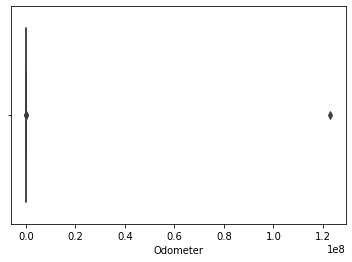

In [16]:
sns.boxplot(x=df['Odometer'])

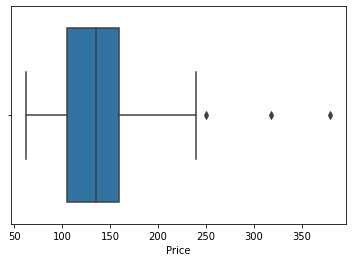

In [17]:
sns.boxplot(x=df['Price'])

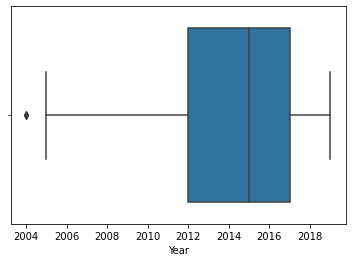

In [18]:
sns.boxplot(x=df['Year'])

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Odometer    62500.0
Price          54.5
Year            5.0
dtype: float64


In [20]:
df = df[~((df < (Q1-(1.5 * IQR) )) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(229, 6)

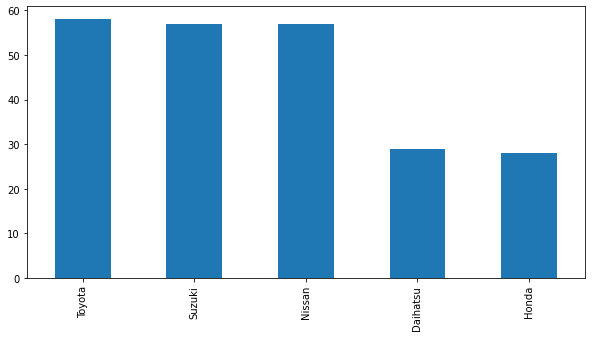

In [25]:
# plotting histogram
df.Brand.value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))

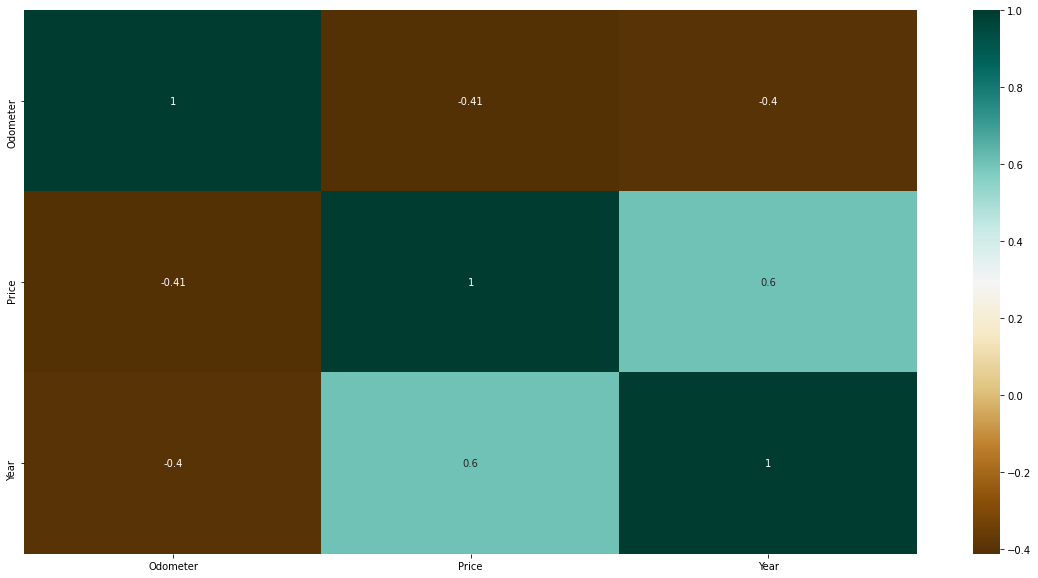

In [29]:
# finding the relations between  the variables
plt.figure(figsize=(20,10))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)

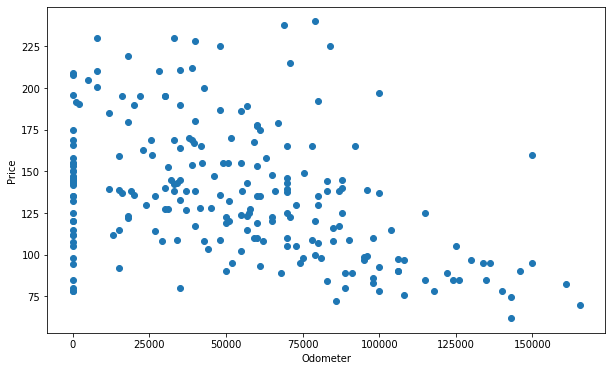

In [35]:
# plotting a scatter plot Odometer vs Price
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Odometer'], df['Price'])
ax.set_xlabel('Odometer')
ax.set_ylabel('Price')
plt.show()